In [1]:
import warnings
from Utils.data_generators import *
from Utils.util_plotting import *
from Utils.util_data_preprocessing import *
package = 'prim'
warnings.filterwarnings('ignore')

/Users/inagege/Documents/00_Uni/Bachelorarbeit/ImprovingSubgroupDiscovery/venv/lib/python3.9/site-packages/ema_workbench/em_framework/evaluators.py:59: UserWarning: ipyparallel not installed - IpyparalleEvaluator not available
  warnings.warn("ipyparallel not installed - IpyparalleEvaluator not available")
/Users/inagege/Documents/00_Uni/Bachelorarbeit/ImprovingSubgroupDiscovery/venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
/Users/inagege/Documents/00_Uni/Bachelorarbeit/ImprovingSubgroupDiscovery/venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_d

experiment 396/400

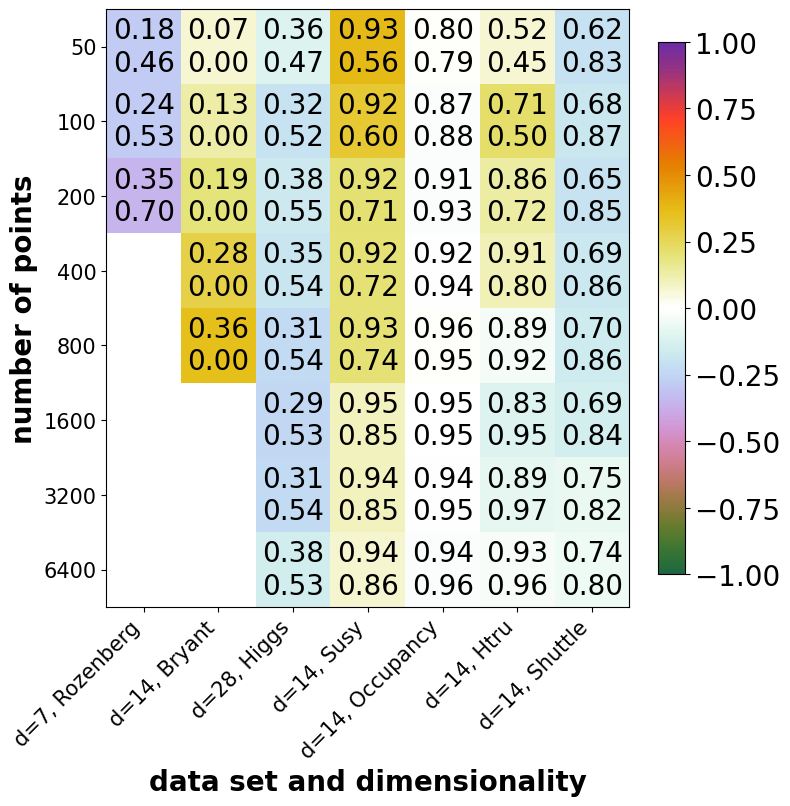

In [2]:
path = '/Users/inagege/Documents/00_Uni/Bachelorarbeit/ImprovingSubgroupDiscovery/PRIM_Improvements/Results_Prim_Improving_PRIM_Estimates/Subgroup_Discovery/same_points_last_baseline/adding_points_dtc'
heatmap_all_results(10, package, [add_data_with_dtc], 'r', path)

experiment 396/400

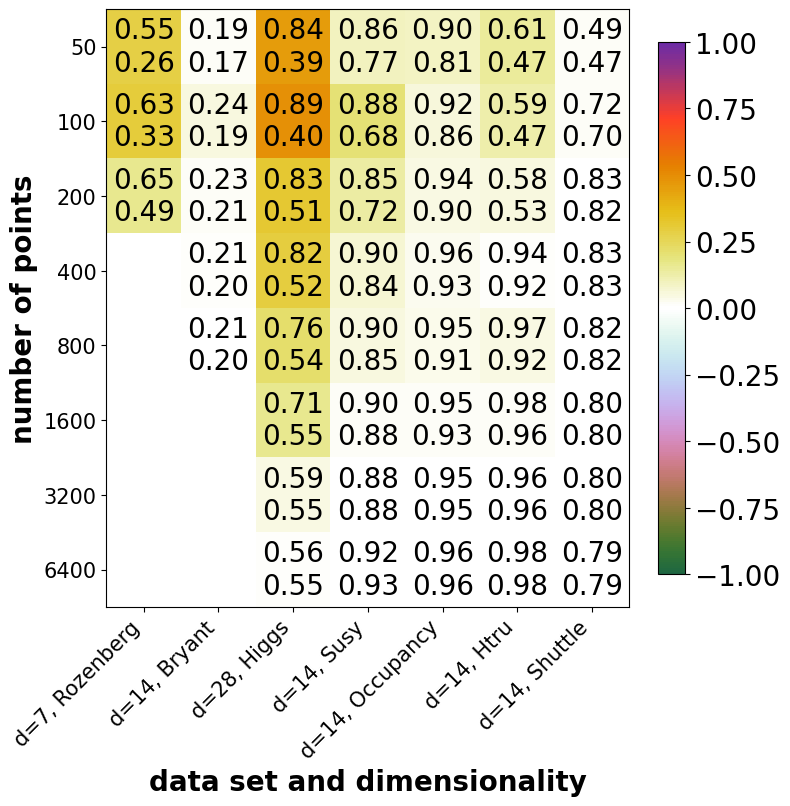

In [3]:
path = '/Users/inagege/Documents/00_Uni/Bachelorarbeit/ImprovingSubgroupDiscovery/PRIM_Improvements/Results_Prim_Improving_PRIM_Estimates/Subgroup_Discovery/same_points_last_baseline/adding_points_SMOTE'
heatmap_all_results(10, package, [add_data_with_smote_dtc], 'r', path)

experiment 396/400

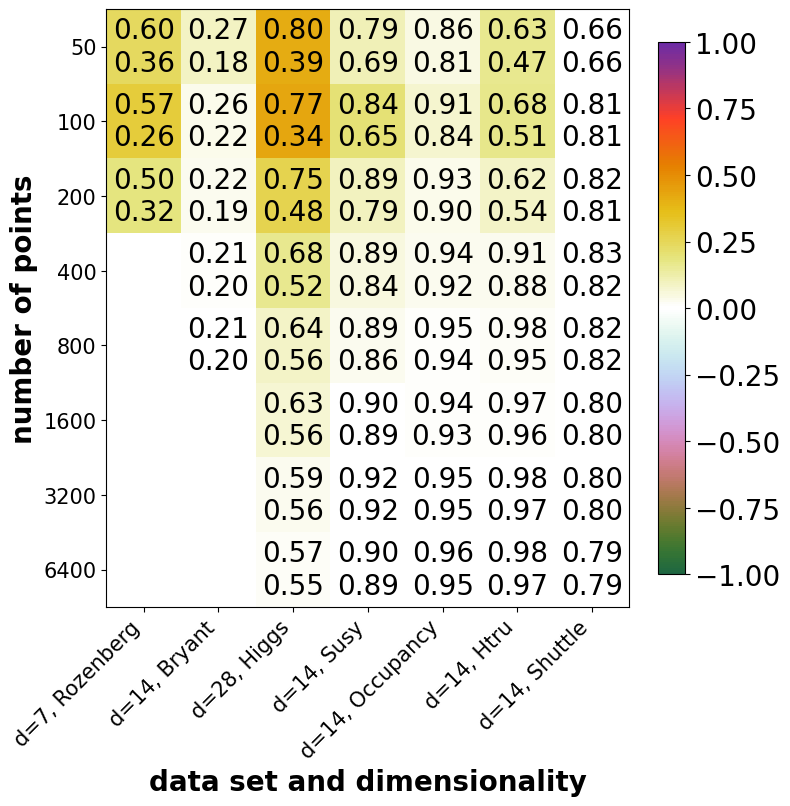

In [4]:
path = '/Users/inagege/Documents/00_Uni/Bachelorarbeit/ImprovingSubgroupDiscovery/PRIM_Improvements/Results_Prim_Improving_PRIM_Estimates/Subgroup_Discovery/same_points_last_baseline/adding_points_SMOTE_without_dtc'
heatmap_all_results(10, package, [add_data_with_smote], 'r', path)

experiment 396/400

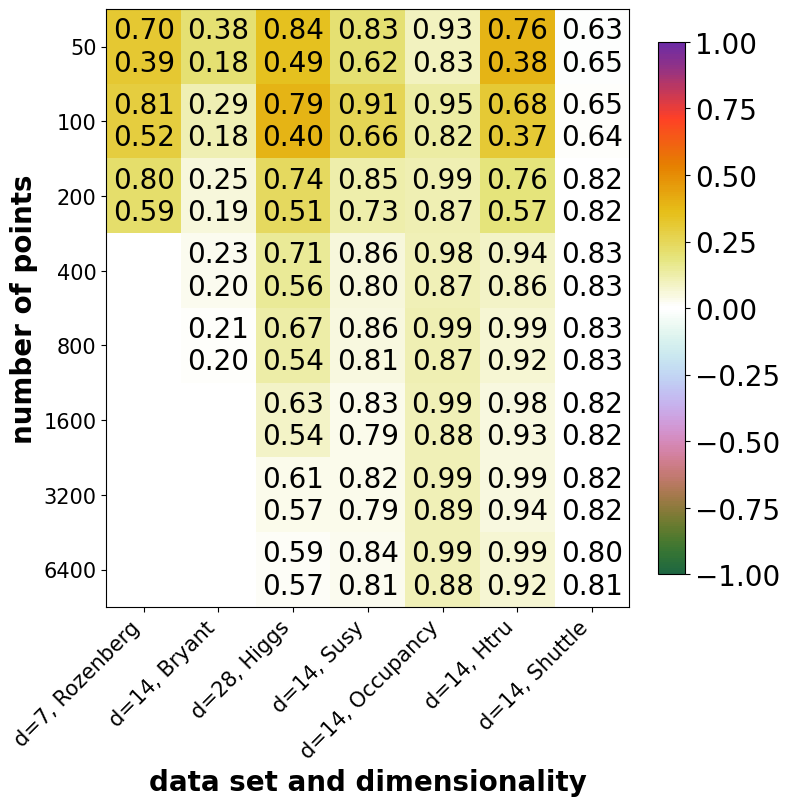

In [2]:
path = '/Users/inagege/Documents/00_Uni/Bachelorarbeit/ImprovingSubgroupDiscovery/PRIM_Improvements/Results_Prim_Improving_PRIM_Estimates/Subgroup_Discovery/same_points_last_baseline/preprocessing/outlier_detection_3'
heatmap_all_results(10, package, [outlier_detection_z_score], 'r', path)

experiment 396/400

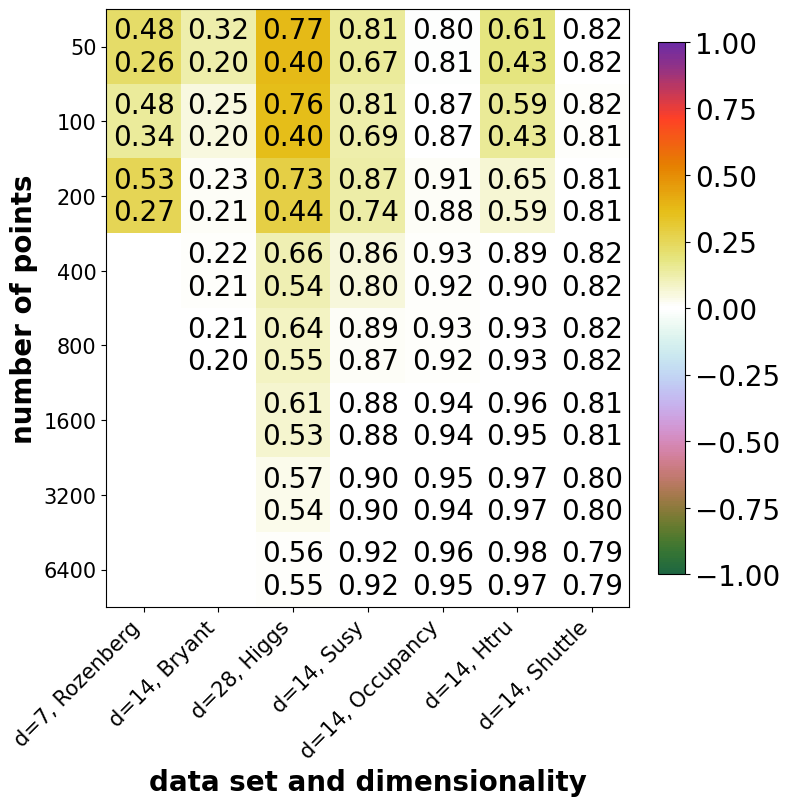

In [3]:
path = '/Users/inagege/Documents/00_Uni/Bachelorarbeit/ImprovingSubgroupDiscovery/PRIM_Improvements/Results_Prim_Improving_PRIM_Estimates/Subgroup_Discovery/same_points_last_baseline/adding_points_gmm/1500pts'
heatmap_all_results(10, package, [add_data_gmm], 'r', path)

experiment 396/400

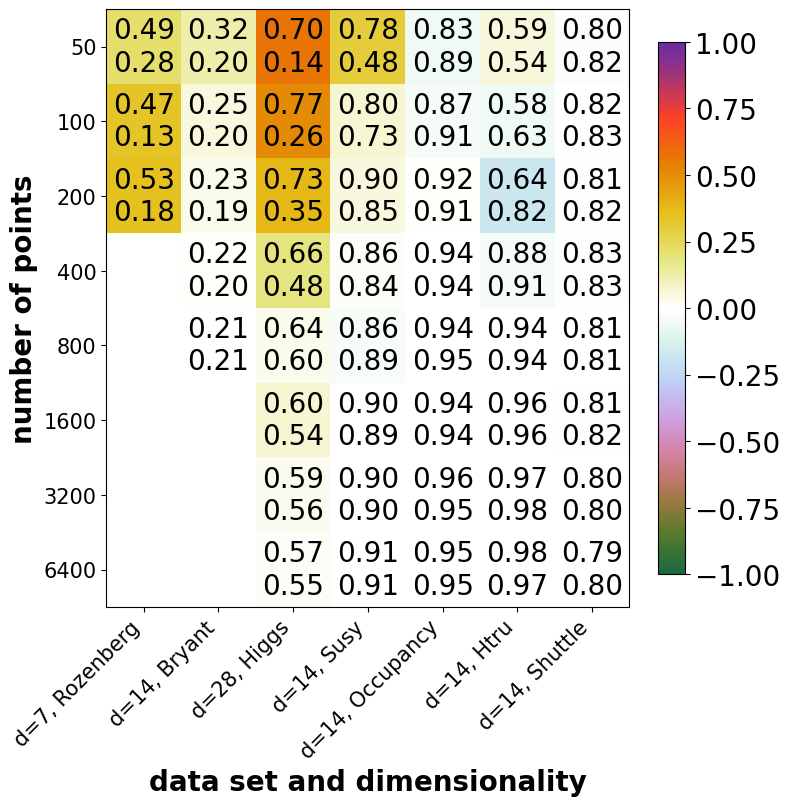

In [2]:
path = '/Users/inagege/Documents/00_Uni/Bachelorarbeit/ImprovingSubgroupDiscovery/PRIM_Improvements/Results_Prim_Improving_PRIM_Estimates/Subgroup_Discovery/last_box/adding_points_gmm/1500pts'
heatmap_all_results(10, package, [add_data_gmm], 'r', path)